In [ ]:
# Importing the required Libraries

import numpy as np                    # numpy
import matplotlib.pyplot as plt       # matplotlib
import pandas as pd                   # pandas

In [ ]:
# Reading dataset from .csv file

dataset = pd.read_csv('sample_data/diabetes.csv') # reading diabetes.csv
dataset.head()                                    # checking the top values 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Calculating the estimated value of k by the number of entries in dataset

import math
N = math.sqrt(768)
k = N/2
print(k)

13.856406460551018


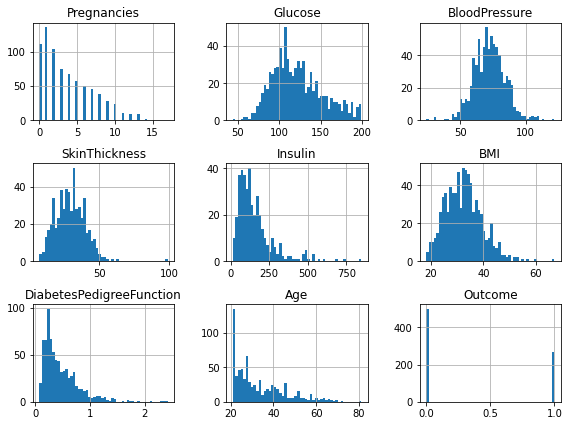

In [ ]:
# Replacing the missing or null entries in dataset by np.Nan

# Plotting the histograms of various parameters (columns) in dataset

col_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for c in col_missing:                                                         # for loop
   dataset[c] = dataset[c].replace(0, np.nan)                                 # replace all the values in every column by np.nan value                        
dataset.hist(bins=50, figsize = (8.0, 6.0))                                   # function used to plot histogram, bins are the size of the BARs in histogram
plt.tight_layout(True)                                                        # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
plt.show()                                                                    # plt. show() starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures


In [ ]:
# Splitting the X and y in test and train sets. Train will be used to fit in the model for doing the 
# predictions on the test set


X = dataset.iloc[:, :-1].values                                                # all rows but exclude the last column
y = dataset.iloc[:, -1].values                                                 # all rows but include only the last column

In [ ]:
# Splitting the X and y in test and train sets. Train will be used to fit in the model for doing the 
# predictions on the test set

from sklearn.model_selection import train_test_split                                              # train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)      # keeping the test size as 0.3 and train size being 0.7, random_state is basically used for reproducing your problem the same every time it is run.     

In [ ]:
# SimpleImputer is used to handle the np.NaN values
# Replacing the missing values with median

from sklearn.impute import SimpleImputer                                                          # The SimpleImputer class provides basic strategies for imputing missing values
impute = SimpleImputer(missing_values = np.NaN, strategy='median')                                # replace all the np.nan values with a strategy called as median. It takes a median of every column and replaces every np.nan value of that respective column
X_train = impute.fit_transform(X_train)                                                           # fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data 
X_test = impute.fit_transform(X_test)                                                             # The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

In [ ]:
# StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance

from sklearn.preprocessing import StandardScaler                                                  # StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. 
sc = StandardScaler()                                                                             
X_train = sc.fit_transform(X_train)                                                               # fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data 
X_test = sc.transform(X_test)                                                                     # The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

In [ ]:
# Using KNN algorithm and fitting the X_train and y_train values
# KNeighborsClassifier is a function and the parameter n_neighbors = 13 is passed as per the calculation above

from sklearn.neighbors import KNeighborsClassifier                                                # KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).
knc = KNeighborsClassifier(n_neighbors = 13)
knc.fit(X_train, y_train)                                                                         # the fit method accepts training data as arguments. 2 columns in case of supervised learning


KNeighborsClassifier(n_neighbors=13)

In [ ]:
# Predicting y label values by X_test features.

y_pred = knc.predict(X_test)                                                                      # predicting the values using test data

In [ ]:
# Printing the actual and predicted y_test values

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))           # printing the actual and predicted values together. reshaping to have two dimensions in numpy array

[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

In [ ]:
# Printing the confusion matrix of actual and predicted y_test values

# Computing accuracy_score to evaluate the accuracy of a classification.

from sklearn.metrics import confusion_matrix, accuracy_score                                      
cm = confusion_matrix(y_test, y_pred)                                         # A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier.
print(cm)                                                                     # printing confusion matrix
accuracy_score(y_test, y_pred)                                                # The accuracy_score function computes the accuracy

[[142  15]
 [ 32  42]]


0.7965367965367965

In [ ]:
# Printing classification report to evaluate metric 

from sklearn.metrics import classification_report                             # import the classification report, It is a performance evaluation metric in machine learning which is used to show the precision, recall, F1 Score, and support score of your trained classification model.
print(classification_report(y_test, y_pred))                                  # print the report

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.74      0.57      0.64        74

    accuracy                           0.80       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.79      0.80      0.79       231



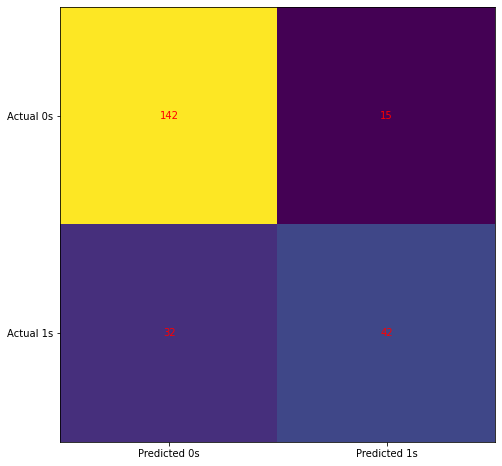

In [ ]:
# Creating multiple subplots to check the actual and the predicted value of the binary outcome

fig, ax = plt.subplots(figsize=(8, 8))                                        # One can use plt.subplots() to make all their subplots at once and it returns the figure and axes (plural of axis) of the subplots as a tuple.
ax.imshow(cm)                                                                 # imshow() method is used to display an image in a window.
ax.grid(False)                                                                # The Axes. grid() function in axes module of matplotlib library is used to Configure the grid lines.
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))       # Ticks are the values used to show specific points on the coordinate axis.
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))             # Ticks are the values used to show specific points on the coordinate axis.
ax.set_ylim(1.5, -0.5)                                                        # set_ylim() function in axes module of matplotlib library is used to set the y-axis view limits.
for i in range(2):                                                            # 2 * 2 image
    for j in range(2):                                                        # 2 * 2 image
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')        # place the count in center in color red
plt.show()                                                                    # plt. show() starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures

In [ ]:
knc.score(X_test, y_test)

0.7965367965367965

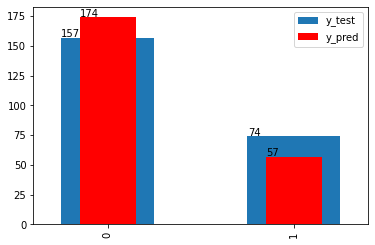

In [ ]:
# Creating multiple BAR Plots to check the actual and the predicted value of the binary outcome


df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
fig, ax = plt.subplots()                                                            # One can use plt.subplots() to make all their subplots at once and it returns the figure and axes (plural of axis) of the subplots as a tuple.
df.y_test.value_counts().plot(kind='bar', ax=ax)                                    # plot the count of y_test
df.y_pred.value_counts().plot(kind='bar', width=0.3, color='r', ax=ax)              # plot the count of y_pred
for p in ax.patches:                                                                # The matplotlib.patches.Rectangle class is used to rectangle patch to a plot with lower left at xy = (x, y) with specified width, height 
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))   # An annotation is a text element that can be placed anywhere in the plot. Show the value of counts. get_height is tweak the string formatting and the offsets to get things centered
plt.legend()                                                                        # add the labels to the plot.
plt.show()                                                                          # plt. show() starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures

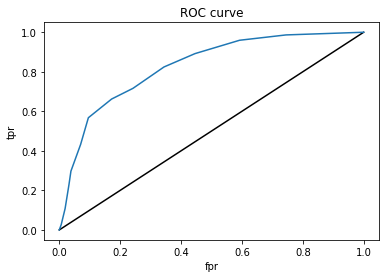

In [ ]:
#  The ROC curve is created by plotting the FPR (false positive rate) vs the TPR (true positive rate) 
#  at various thresholds settings

from sklearn.metrics import roc_curve                             # roc_auc_score is defined as the area under the ROC curve, which is the curve having False Positive Rate on the x-axis and True Positive Rate on the y-axis at all classification thresholds.
y_pred_proba = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)            # roc_auc_score is defined as the area under the ROC curve, which is the curve having False Positive Rate on the x-axis and True Positive Rate on the y-axis at all classification thresholds.
plt.plot([0,1],[0,1],'k-')                                        # plot the x and y axis in the range of 0 to 1, label being DT
plt.plot(fpr,tpr, label='DT')                                     # plot the fpr and tpr obtained
plt.xlabel('fpr')                                                 # x label
plt.ylabel('tpr')                                                 # y label
plt.title('ROC curve')                                            # title
plt.show()                                                        # plt. show() starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures

In [ ]:
#Checking roc_auc_score for y_test and y_pred. It provides area under the curve

from sklearn.metrics import roc_auc_score                # roc_auc_score is defined as the area under the ROC curve, which is the curve having False Positive Rate on the x-axis and True Positive Rate on the y-axis at all classification thresholds.
roc_auc_score(y_test,y_pred)                             # calculating roc_auc_score for y_test and y_pred (predicted y)


0.7360130831468411

In [ ]:
#Checking roc_auc_score for y_test and y_pred_proba. It provides area under the curve

from sklearn.metrics import roc_auc_score               # roc_auc_score is defined as the area under the ROC curve, which is the curve having False Positive Rate on the x-axis and True Positive Rate on the y-axis at all classification thresholds.
roc_auc_score(y_test,y_pred_proba)                      # calculating roc_auc_score for y_test and y_pred_proba (probability of predicted y)

0.8277672577035635